In [2]:
### IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('movie_metadata.csv')
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [6]:
df.shape
print(f"The dataset has {df.shape[0]} and {df.shape[1]}")

The dataset has 5043 and 28


In [7]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
##  THE DISTRIBUTION OF THE DATASET ##
def plot_hist(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        plt.subplot(4,4, i+1)
        plt.hist(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [ ]:
cont_df = df.select_dtypes(include=["int64","float64"])
cont_df.head(3)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


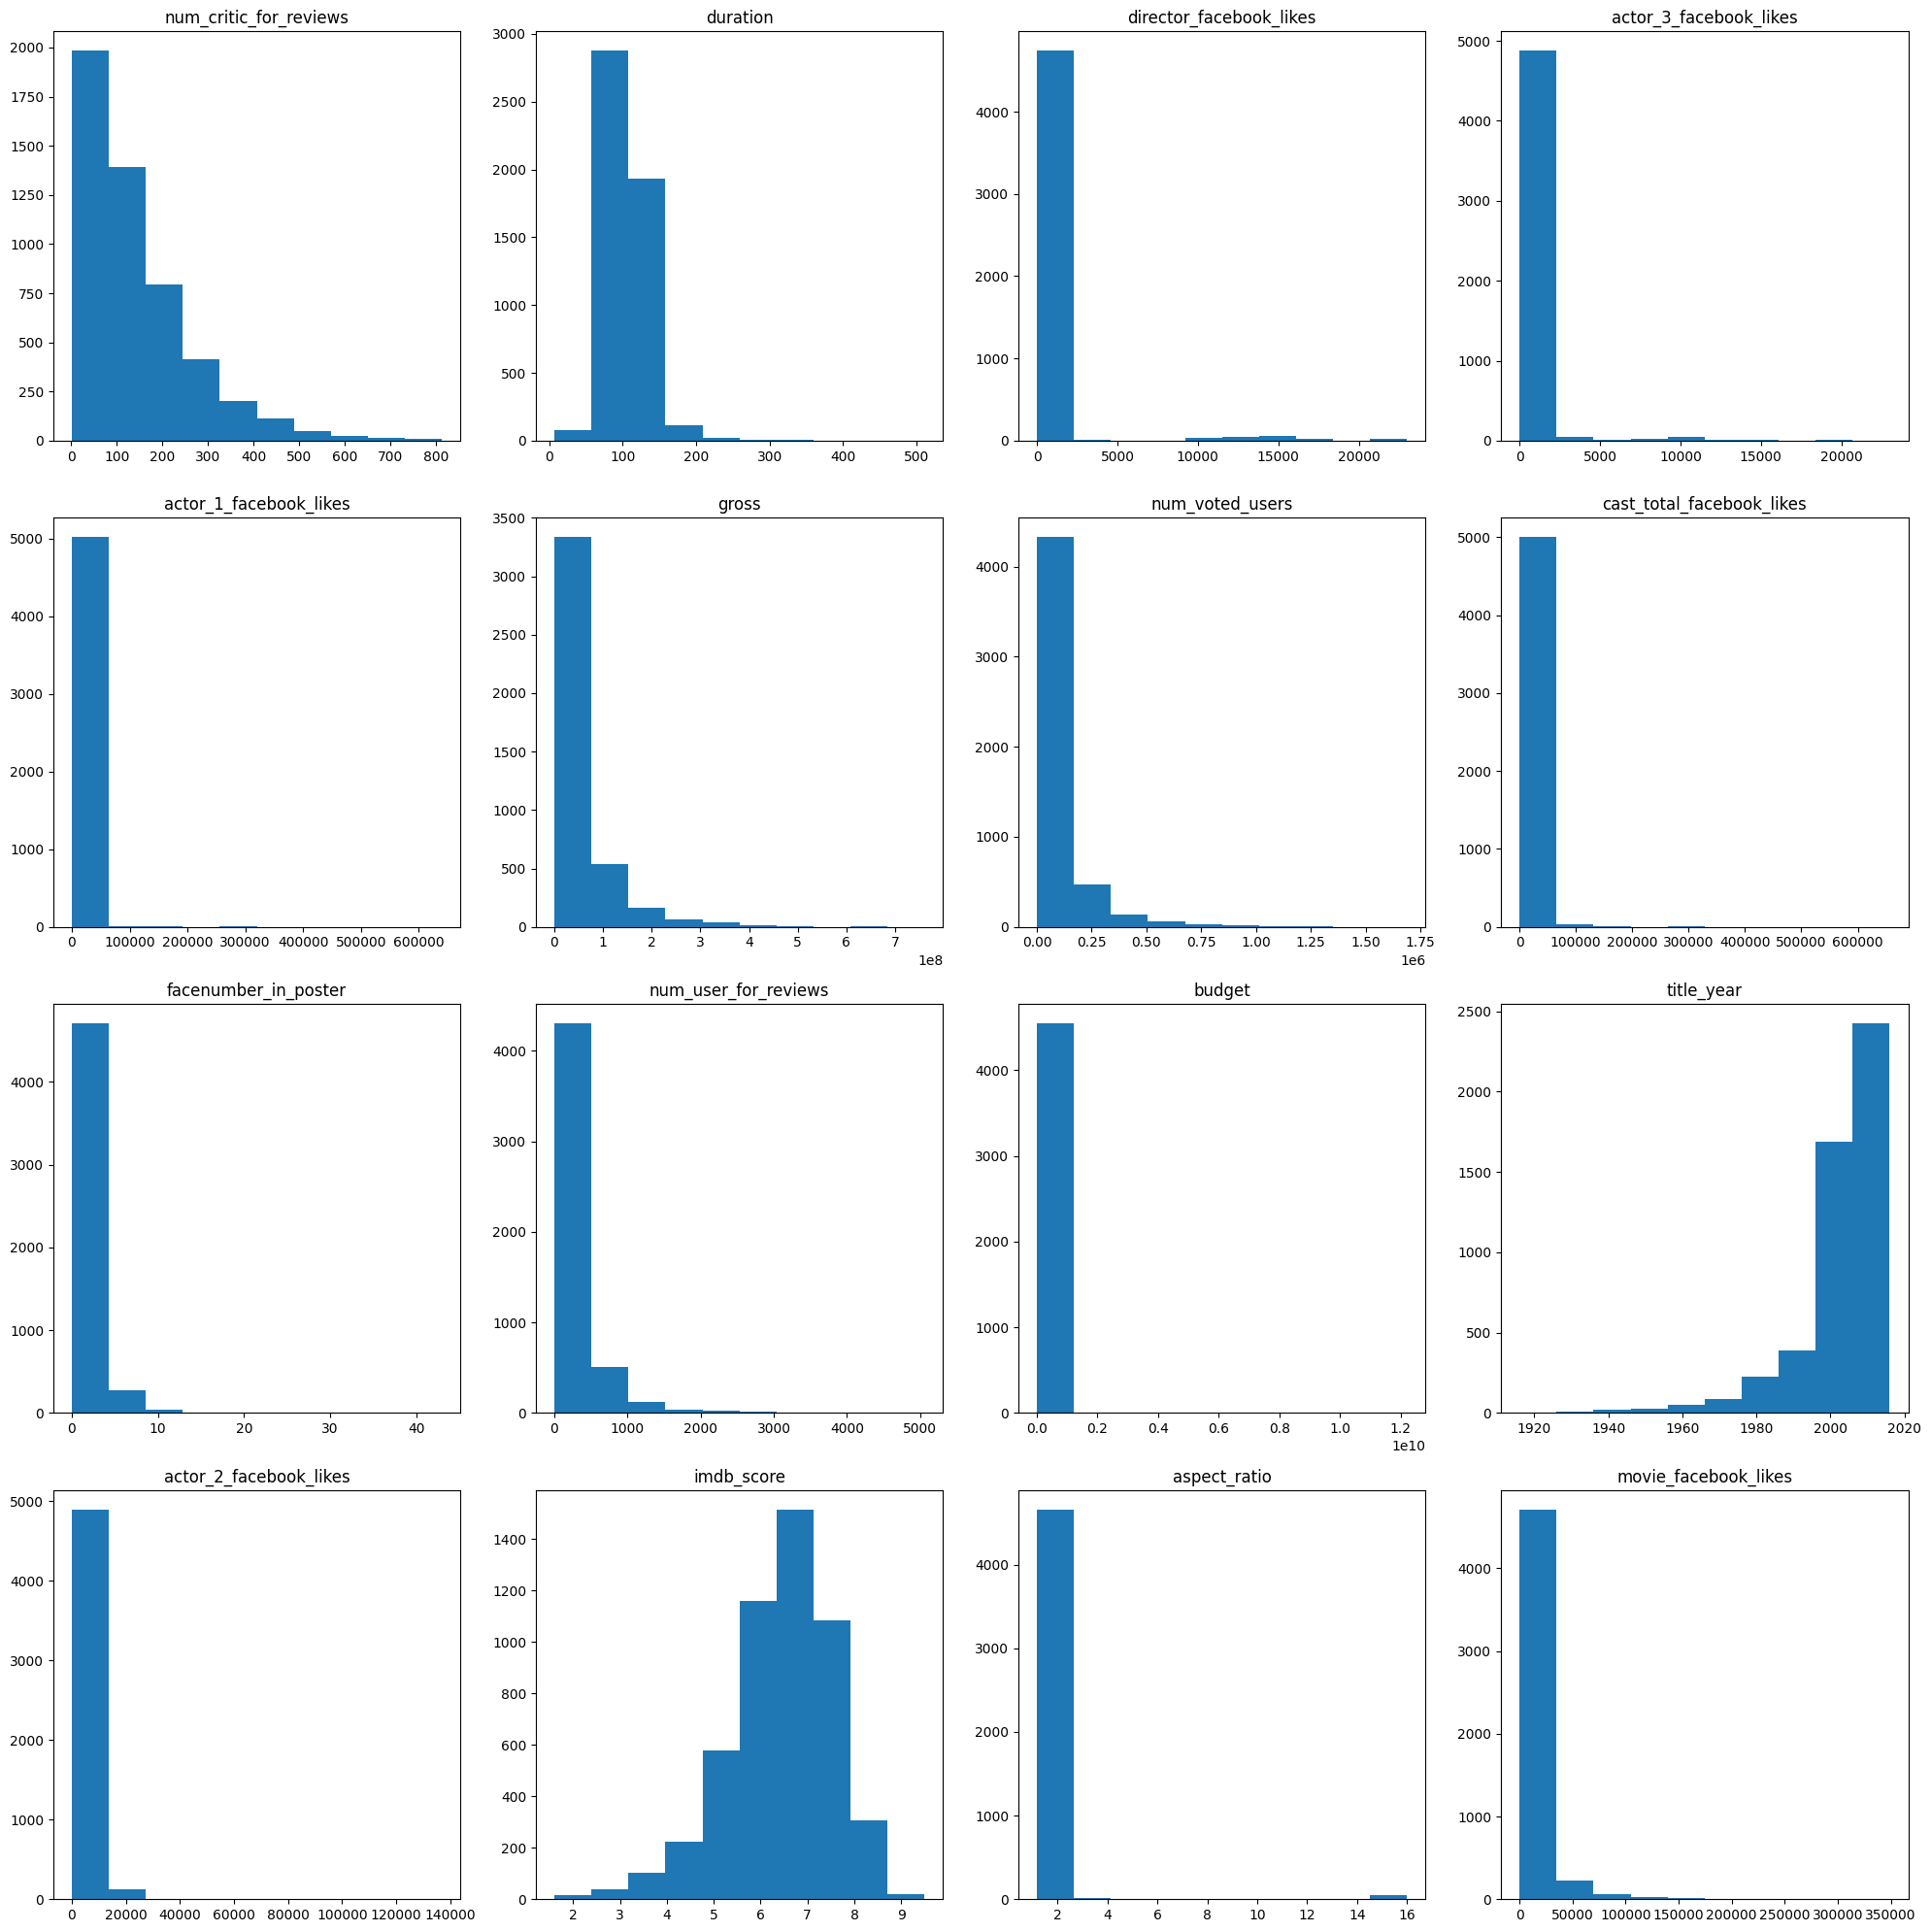

In [10]:
plot_hist(cont_df)

In [11]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
#### imdb_score with mean
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())
df['imdb_score'].isna().sum()

0

In [14]:
### A FUNCTION TO REMOVE MISSING VALUES ##
def remove_missing_values(df, strategy='median'):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    cat_cols = df.select_dtypes(include=['object','category']).columns

    if strategy == 'median':
        df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    elif strategy == 'mean':
        df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    elif strategy == 'mode':
        df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [15]:
remove_missing_values(df,'mode')

In [16]:
remove_missing_values(df,'median')

In [17]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64